### Plot dF/F response to trains of APs

* Simultaneous ephys-ophys data were recorded by Marton Rozsa <marton.rozsa@alleninstitute.org>
* Parameter fits were done by Ziqiang Wei <weiz@janelia.hhmi.org>
* Model parameters were reported in Table S8
* Single-cell statistics were reported in Supplementary Figure 22

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from spike2calcium_sigmoid_ALS_SD import sigmoid, spike2calcium
import pandas as pd
import seaborn as sns
sns.set(font_scale=1.5, style='ticks')
%matplotlib inline

In [2]:
param_list = pd.read_csv('parameter_fits.csv')

In [3]:
param_list

,Sensors,rise,decay1,decay2,r,Fm,Ca0,beta,F0
0,jGCaMP8f,1.85,34.07,263.70,0.48,6.104380,4.170575,0.390533,-1.001000
1,jGCaMP8m,2.46,41.64,245.80,0.28,7.454645,2.691117,0.360008,-2.050880
2,jGCaMP8s,5.65,86.26,465.45,0.19,7.455792,1.282417,0.343721,-2.919320
3,jGCaMP7f,16.21,95.27,398.22,0.24,6.841247,5.562159,0.423212,-0.593480
4,XCaMP-Gf,13.93,99.38,312.85,0.20,2.363793,3.936075,0.471668,-0.319370
5,GCaMP6s,50.81,1702.21,0.00,0.00,3.334000,3.142000,1.332000,-0.049982
6,GCaMP6s-TG,133.01,1262.78,0.00,0.00,3.596000,3.303000,2.897000,-0.000251
7,GCaMP6f,9.98,682.58,0.00,0.00,1.905000,3.197000,1.410000,-0.020769
8,GCaMP6f-TG,20.82,629.74,0.00,0.00,2.818000,5.821000,1.046000,-0.006377


### Exemplary simulation
* jGCaMP8m
* 1AP
* 3 APs at 10Hz
* 10 APs at 50 Hz

#### spike train generation

In [4]:
time_ = np.arange(-100, 500) # using ms here
train1 = [0] #1 AP
train2 = np.arange(0, 300, 100) # 3 APs at 10Hz
train3 = np.arange(0, 200, 20) # 10 APs at 50 Hz
trains = [train1, train2, train3]

#### parameters for jGCaMP8m

In [5]:
params = param_list.iloc[1]
param_linear = [params['rise'], params['decay1'], params['decay2'], params['r']]
param_sigmoid = [params['Fm'], params['Ca0'], params['beta'], params['F0']]

In [6]:
# F = spike2calcium(trains[0], time_, param_linear)
# F = sigmoid(F, *param_sigmoid)

# plt.plot(time_, F)
# plt.ylabel('dF/F')
# plt.xlabel('time (ms)')

In [7]:
F_list = []
for n in range(3):
    F = spike2calcium(trains[n], time_, param_linear)
    F = sigmoid(F, *param_sigmoid)
    F_list.append(F)
F_list = np.array(F_list)

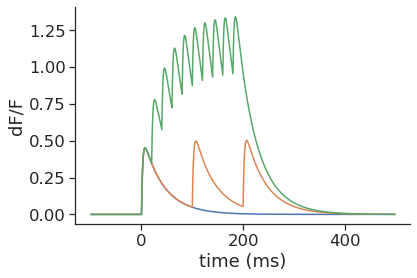

In [8]:
plt.plot(time_, F_list.T)
plt.ylabel('dF/F')
plt.xlabel('time (ms)')
sns.despine()
# plt.savefig('example_response_model.pdf')
plt.show()